In [1]:
import pandas as pd
import numpy as np
import re
import string

# Search hack on dataframes
### How to use: find(data,"movie_id","equal","tt6723088")

<h3>Search functions available</h3>

<ol>
  <li>Equal</li>
  <li>Not Equal</li>
  <li>Lessser than</li>
  <li>Greater than</li>
  <li>Null</li>    
  <li>Not null</li>
  <li>Contains</li>
  <li>Not contains</li>
  <li>Duplicate</li>
  <li>Index</li>
  <li>Unique Value</li>
  <li>Unique Count</li>
</ol> 

In [2]:
# Useful Search hack for any value in a column


def find(dataFrame,columnName,operation,searchElement):
    operation = operation.lower().translate(str.maketrans('', '', string.whitespace))
    if operation == "equal": 
        return dataFrame.loc[dataFrame[columnName] == searchElement]
    elif operation == "notequal":
        return dataFrame.loc[dataFrame[columnName] != searchElement]
    elif operation == "lesserthan":
        return dataFrame.loc[dataFrame[columnName] < searchElement]
    elif operation == "greaterthan": 
        return dataFrame.loc[dataFrame[columnName] > searchElement]
    elif operation == "null":
        return dataFrame.loc[dataFrame[columnName].isna()] 
    elif operation == "notnull":
        dataFrame.loc[dataFrame[columnName].notnull()]
    elif operation == "contains":
        return dataFrame[dataFrame[columnName].str.contains(searchElement)]
    elif operation == "notcontains":
        return dataFrame[~dataFrame[columnName].str.contains(searchElement)]   
    elif operation == "duplicate":
        return dataFrame[dataFrame.duplicated([columnName])].sort_values(by=[columnName])
    elif operation == "index":
        return dataFrame.index[dataFrame[columnName] == searchElement].tolist()
    elif operation == "uniquevalue":
        return dataFrame[columnName].unique()
    elif operation == "uniquecount":
        return dataFrame[columnName].nunique()
    else:
        print("The operations you can use are listed above! \n")

In [3]:
#fileLocation = 'C:\\Users\\VictorY\\Desktop\\TestData\\stage3FinalProcessedDF_Nov-24-2019.csv'
#fileLocation = 'C:\\Users\\VictorY\\Desktop\\TestData\\stage3FinalProcessedDF_Nov-17-2019.csv'
fileLocation = 'C:\\Users\\VictorY\\Desktop\\TestData\\stage3FinalProcessedDF_Dec-15-2019.csv'
#fileLocation = 'C:\\Yuva\\ITU\\3rd Sem\\Research Topics\\Movies & Gender\\Data\\IMDb\\stage3FinalProcessedDF_Nov-17-2019.csv'

data = pd.read_csv(fileLocation)

# Reset the missing years in birth and death year of director to 0
data.loc[(data['deathYear'].str.contains('N',na=False) | data['deathYear'].isna()), 'deathYear'] = 0
data.loc[(data['birthYear'].str.contains('N',na=False) | data['birthYear'].isna() ), 'birthYear'] = 0
# data.loc[data['deathYear'].isna(), 'deathYear'] = 0
# data.loc[data['birthYear'].isna(), 'birthYear'] = 0

In [4]:
find(data,"movie_id","uniquecount",0)

612426

In [5]:
data

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,release_date,movie_year,birthYear,deathYear,primaryProfession,knownForTitles,Gender
0,nm0005690,William K.L. Dickson,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,1894-03-10,10 March 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male
1,nm0721526,Émile Reynaud,tt0000002,A bohóc és kutyái (1892) - IMDb,0,None,None,6.5,148,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male
2,nm0721526,Émile Reynaud,tt0000003,Szegény Pierrot (1892) - IMDb,12,5,None,6.6,819,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male
3,nm0721526,Émile Reynaud,tt0000004,Egy jó pohár sör (1892) - IMDb,1,None,None,6.6,90,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male
4,nm0005690,William K.L. Dickson,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,1893-05-09,9 May 1893 (USA) See more »,1893,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male
5,nm0005690,William K.L. Dickson,tt0000006,Kínai ópiumbarlang (1894) - IMDb,None,None,None,5.7,70,1894-10-17,17 October 1894 (UK) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male
6,nm0005690,William K.L. Dickson,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,2008-12-31,None,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male
7,nm0374658,William Heise,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,2008-12-31,None,1894,1847,1910,"cinematographer,director,producer","tt0285863,tt0241393,tt0229665,tt0241715",Male
8,nm0005690,William K.L. Dickson,tt0000008,Edison asszisztense tüsszent (1894) - IMDb,19,4,None,5.6,1341,1894-01-09,9 January 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male
9,nm0085156,Alexander Black,tt0000009,Miss Jerry (1894) - IMDb,1,2,None,5.6,58,1894-10-09,9 October 1894 (USA) See more »,1894,1859,1940,"director,writer,cinematographer",tt0000009,Male


In [6]:
# Sort ascending by movie_year to find the first movie produced year of each director

sortAscendingDF = data.sort_values(by='movie_year',ascending = True)
AscendingWithoutDuplicatesDP = sortAscendingDF.drop_duplicates(subset= 'director_ids',keep='first')

# Store Career Start year of each director. Fetch the columns required for merge

fetchFirstMovieYearDF = AscendingWithoutDuplicatesDP[['movie_year','director_ids']]
fetchFirstMovieYearDF = fetchFirstMovieYearDF.rename(columns={'movie_year':'CareerStartYear'})

WithFirstMovieYearDF = data.merge(fetchFirstMovieYearDF, on='director_ids',how = 'left')
#WithFirstMovieYearDF["Career_Year_Number"] = WithFirstMovieYearDF.movie_year - WithFirstMovieYearDF.CareerStartYear + 1
WithFirstMovieYearDF["Career_Year_Number"] = WithFirstMovieYearDF.movie_year - WithFirstMovieYearDF.CareerStartYear

In [7]:
WithFirstMovieYearDF

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,release_date,movie_year,birthYear,deathYear,primaryProfession,knownForTitles,Gender,CareerStartYear,Career_Year_Number
0,nm0005690,William K.L. Dickson,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,1894-03-10,10 March 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,4
1,nm0721526,Émile Reynaud,tt0000002,A bohóc és kutyái (1892) - IMDb,0,None,None,6.5,148,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,0
2,nm0721526,Émile Reynaud,tt0000003,Szegény Pierrot (1892) - IMDb,12,5,None,6.6,819,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,0
3,nm0721526,Émile Reynaud,tt0000004,Egy jó pohár sör (1892) - IMDb,1,None,None,6.6,90,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,0
4,nm0005690,William K.L. Dickson,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,1893-05-09,9 May 1893 (USA) See more »,1893,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,3
5,nm0005690,William K.L. Dickson,tt0000006,Kínai ópiumbarlang (1894) - IMDb,None,None,None,5.7,70,1894-10-17,17 October 1894 (UK) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,4
6,nm0005690,William K.L. Dickson,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,2008-12-31,None,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,4
7,nm0374658,William Heise,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,2008-12-31,None,1894,1847,1910,"cinematographer,director,producer","tt0285863,tt0241393,tt0229665,tt0241715",Male,1890,4
8,nm0005690,William K.L. Dickson,tt0000008,Edison asszisztense tüsszent (1894) - IMDb,19,4,None,5.6,1341,1894-01-09,9 January 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,4
9,nm0085156,Alexander Black,tt0000009,Miss Jerry (1894) - IMDb,1,2,None,5.6,58,1894-10-09,9 October 1894 (USA) See more »,1894,1859,1940,"director,writer,cinematographer",tt0000009,Male,1894,0


In [8]:
WithFirstMovieYearDF.nunique()

director_ids           171212
director_names         167352
movie_id               612426
title                  609863
review_count_user        1050
review_count_critic       538
metascore                 101
rating_value               92
rating_count            14790
date_published          33831
release_date           186979
movie_year                132
birthYear                 165
deathYear                 114
primaryProfession        4486
knownForTitles         167448
Gender                      2
CareerStartYear           130
Career_Year_Number         89
dtype: int64

In [9]:
# Convert into int years before using

WithFirstMovieYearDF.movie_year = WithFirstMovieYearDF.movie_year.astype(int)
WithFirstMovieYearDF.deathYear = WithFirstMovieYearDF.deathYear.astype(int)
WithFirstMovieYearDF.birthYear = WithFirstMovieYearDF.birthYear.astype(int)

In [10]:
# The records which we believe contain incorrect data. i.e. movies released after 10 years of directors death
years_after_death = 10
dropIncorrectlyRecordedYears = WithFirstMovieYearDF.loc[(WithFirstMovieYearDF.movie_year - WithFirstMovieYearDF.deathYear >= years_after_death) & (WithFirstMovieYearDF.deathYear !=0)]
dropIncorrectlyRecordedYears

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,release_date,movie_year,birthYear,deathYear,primaryProfession,knownForTitles,Gender,CareerStartYear,Career_Year_Number
18651,nm0883920,Travers Vale,tt0037732,Gaslight Follies (1945) - IMDb,1,None,None,5.2,12,1945-09-28,28 September 1945 (USA) See more »,1945,1865,1927,"director,writer,producer","tt0008557,tt0013483,tt0002901,tt0007426",Male,1917,28
21298,nm0000248,Edward D. Wood Jr.,tt0040844,Crossroads of Laredo (1995) - IMDb,4,2,None,3.8,151,2008-12-17,None,1995,1924,1978,"writer,director,actor","tt0045826,tt0047127,tt0067479,tt0052077",Male,1951,44
33650,nm0001178,Sergei M. Eisenstein,tt0051790,Rettegett Iván 2. (1958) - IMDb,34,28,None,7.7,5234,1958-09-01,1 September 1958 (Soviet Union) See more »,1958,1898,1948,"director,writer,editor","tt0079020,tt0037824,tt0029850,tt0015648",Male,1923,35
43215,nm0909098,Herb Wallerstein,tt0058815,"Jeannie, a háziszellem (TV Series 1965–1970) -...",43,13,None,7.5,8897,2006-07-22,10 September 2001 (Hungary) See more »,2001,1925,1985,"assistant_director,director,production_manager","tt0071054,tt0060028,tt0060009,tt0058855",Male,1955,46
43216,nm0328837,Richard Goode,tt0058815,"Jeannie, a háziszellem (TV Series 1965–1970) -...",43,13,None,7.5,8897,2006-07-22,10 September 2001 (Hungary) See more »,2001,1922,1972,"director,actor,writer","tt0042123,tt0039123,tt0389623,tt0047756",Male,1947,54
43218,nm0748979,Oscar Rudolph,tt0058815,"Jeannie, a háziszellem (TV Series 1965–1970) -...",43,13,None,7.5,8897,2006-07-22,10 September 2001 (Hungary) See more »,2001,1911,1991,"director,actor,assistant_director","tt0059968,tt0047423,tt0056695,tt0055554",Male,1949,52
43226,nm0077073,Jerrold Bernstein,tt0058815,"Jeannie, a háziszellem (TV Series 1965–1970) -...",43,13,None,7.5,8897,2006-07-22,10 September 2001 (Hungary) See more »,2001,1930,1979,"assistant_director,director,production_manager","tt0060013,tt0314164,tt0051226,tt0047747",Male,1958,43
45057,nm0817081,Robert Sparr,tt0060028,Star Trek (TV Series 1966–1969) - IMDb,164,93,None,8.4,52990,2002-06-09,2 November 1997 (Hungary) See more »,1997,1915,1969,"director,editor,editorial_department","tt0058855,tt0059771,tt0060028,tt0051247",Male,1954,43
45070,nm0018354,David Alexander,tt0060028,Star Trek (TV Series 1966–1969) - IMDb,164,93,None,8.4,52990,2002-06-09,2 November 1997 (Hungary) See more »,1997,1914,1983,"director,producer","tt0050010,tt0057765,tt0058805,tt0060028",Male,1950,47
45077,nm0909098,Herb Wallerstein,tt0060028,Star Trek (TV Series 1966–1969) - IMDb,164,93,None,8.4,52990,2002-06-09,2 November 1997 (Hungary) See more »,1997,1925,1985,"assistant_director,director,production_manager","tt0071054,tt0060028,tt0060009,tt0058855",Male,1955,42


In [11]:
# Drop all values containing incorrect recorded years as per the above assumption

WithFirstMovieYearDF.drop(dropIncorrectlyRecordedYears.index, inplace= True)

In [12]:
WithFirstMovieYearDF

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,release_date,movie_year,birthYear,deathYear,primaryProfession,knownForTitles,Gender,CareerStartYear,Career_Year_Number
0,nm0005690,William K.L. Dickson,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,1894-03-10,10 March 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,4
1,nm0721526,Émile Reynaud,tt0000002,A bohóc és kutyái (1892) - IMDb,0,None,None,6.5,148,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,0
2,nm0721526,Émile Reynaud,tt0000003,Szegény Pierrot (1892) - IMDb,12,5,None,6.6,819,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,0
3,nm0721526,Émile Reynaud,tt0000004,Egy jó pohár sör (1892) - IMDb,1,None,None,6.6,90,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,0
4,nm0005690,William K.L. Dickson,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,1893-05-09,9 May 1893 (USA) See more »,1893,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,3
5,nm0005690,William K.L. Dickson,tt0000006,Kínai ópiumbarlang (1894) - IMDb,None,None,None,5.7,70,1894-10-17,17 October 1894 (UK) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,4
6,nm0005690,William K.L. Dickson,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,2008-12-31,None,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,4
7,nm0374658,William Heise,tt0000007,A Corbett-Courtney bokszmeccs (1894) - IMDb,5,2,None,5.5,499,2008-12-31,None,1894,1847,1910,"cinematographer,director,producer","tt0285863,tt0241393,tt0229665,tt0241715",Male,1890,4
8,nm0005690,William K.L. Dickson,tt0000008,Edison asszisztense tüsszent (1894) - IMDb,19,4,None,5.6,1341,1894-01-09,9 January 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,4
9,nm0085156,Alexander Black,tt0000009,Miss Jerry (1894) - IMDb,1,2,None,5.6,58,1894-10-09,9 October 1894 (USA) See more »,1894,1859,1940,"director,writer,cinematographer",tt0000009,Male,1894,0


In [13]:
WithFirstMovieYearDF.Career_Year_Number.value_counts()

0     188232
2      31070
3      30561
4      29451
1      29353
5      28167
6      27414
7      26182
8      25336
9      24633
10     23235
11     21924
12     20681
13     19425
14     18501
15     17091
16     16501
17     15209
18     14341
19     13841
20     13168
21     11800
22     11357
23     10247
24      9759
25      8815
26      8643
27      7855
28      7240
29      7071
       ...  
54       451
55       417
56       279
57       238
58       219
62       169
60       165
61       139
59       133
63       120
64        55
65        33
66         9
68         7
69         5
72         5
67         4
71         4
70         3
76         3
77         3
75         3
83         2
81         2
74         2
73         2
79         2
84         1
78         1
91         1
Name: Career_Year_Number, Length: 84, dtype: int64

# Cleaned the data for Pivot operations

In [14]:
# Act as a counter for pivot table calculations

WithFirstMovieYearDF['Dummy'] = 1

In [15]:
WithFirstMovieYearDF.head()

,director_ids,director_names,movie_id,title,review_count_user,review_count_critic,metascore,rating_value,rating_count,date_published,release_date,movie_year,birthYear,deathYear,primaryProfession,knownForTitles,Gender,CareerStartYear,Career_Year_Number,Dummy
0,nm0005690,William K.L. Dickson,tt0000001,Carmencita - spanyol tánc (1894) - IMDb,12,2,None,5.8,1255,1894-03-10,10 March 1894 (USA) See more »,1894,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,4,1
1,nm0721526,Émile Reynaud,tt0000002,A bohóc és kutyái (1892) - IMDb,0,None,None,6.5,148,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,0,1
2,nm0721526,Émile Reynaud,tt0000003,Szegény Pierrot (1892) - IMDb,12,5,None,6.6,819,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,0,1
3,nm0721526,Émile Reynaud,tt0000004,Egy jó pohár sör (1892) - IMDb,1,None,None,6.6,90,1892-10-28,28 October 1892 (France) See more »,1892,1844,1918,director,"tt2184231,tt0000003,tt2184201,tt0413219",Male,1892,0,1
4,nm0005690,William K.L. Dickson,tt0000005,A patkolókovács (1893) - IMDb,18,3,None,6.2,1499,1893-05-09,9 May 1893 (USA) See more »,1893,1860,1935,"cinematographer,director,producer","tt0219560,tt6687694,tt1428455,tt1496763",Male,1890,3,1


In [16]:
malePivotData = WithFirstMovieYearDF.loc[WithFirstMovieYearDF['Gender'] == 'Male']

In [17]:
malePivotData.nunique()

director_ids           126180
director_names         122810
movie_id               505395
title                  503790
review_count_user        1003
review_count_critic       524
metascore                 101
rating_value               92
rating_count            13625
date_published          33278
release_date           167785
movie_year                131
birthYear                 164
deathYear                 114
primaryProfession        3768
knownForTitles         123950
Gender                      1
CareerStartYear           129
Career_Year_Number         84
Dummy                       1
dtype: int64

In [18]:
femalePivotData = WithFirstMovieYearDF.loc[WithFirstMovieYearDF['Gender'] == 'Female']

In [19]:
femalePivotData.nunique()

director_ids            45050
director_names          44529
movie_id               136604
title                  136338
review_count_user         538
review_count_critic       324
metascore                  92
rating_value               92
rating_count             5981
date_published          20120
release_date            68678
movie_year                124
birthYear                 140
deathYear                  98
primaryProfession        2615
knownForTitles          44215
Gender                      1
CareerStartYear           118
Career_Year_Number         69
Dummy                       1
dtype: int64

In [20]:
# Reseting the pivot table index so I can have directorID and Gender as column and rotate

malePivotTable = pd.pivot_table(malePivotData, values='Dummy', index=['director_ids'],
                                columns=['Career_Year_Number',], aggfunc=np.sum)

In [21]:
# Reseting the pivot table index so I can have directorID and Gender as column and rotate

femalePivotTable = pd.pivot_table(femalePivotData, values='Dummy', index=['director_ids'],
                                  columns=['Career_Year_Number'], aggfunc=np.sum)

In [22]:
overallPivotTable = pd.pivot_table(WithFirstMovieYearDF, values='Dummy', index=['director_ids'],
                                   columns=['Career_Year_Number'], aggfunc=np.sum)

In [23]:
femalePivotTable.head()

Career_Year_Number,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,69,70,71,72
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000037,1.0,NaN,NaN,2.0,NaN,NaN,1.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000069,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000096,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000097,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000098,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
malePivotTable.head()

Career_Year_Number,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,81,83,84,91
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000005,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000008,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000009,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000010,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000018,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
overallPivotTable.head()

Career_Year_Number,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,81,83,84,91
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000005,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000008,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000009,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000010,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000018,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Capture career length

In [26]:
#overallPivotTable = saef.copy()
saef = overallPivotTable.copy()

In [27]:
# # Reverse the columns to search from the last career year number
# overallPivotTable = overallPivotTable[overallPivotTable.columns[::-1]]

In [28]:
# Function to find the column name of the last non null value. This is our career length of every director

def columnNameOfFirstNonNullValue(x):
    if x.last_valid_index() is None:
        return None
    else:
        return x.last_valid_index()

In [29]:
career_length_overall = overallPivotTable.apply(columnNameOfFirstNonNullValue, axis= 'columns')
career_length_male = malePivotTable.apply(columnNameOfFirstNonNullValue, axis= 'columns')
career_length_female = femalePivotTable.apply(columnNameOfFirstNonNullValue, axis= 'columns')

In [30]:
career_length_overall
#career_length_male
#career_length_female

director_ids
nm0000005    62
nm0000008     0
nm0000009     0
nm0000010     0
nm0000018     2
nm0000019    39
nm0000024     0
nm0000032    16
nm0000033    60
nm0000036    48
nm0000037    27
nm0000040    48
nm0000041    52
nm0000044    20
nm0000045     6
nm0000048     0
nm0000050     0
nm0000051     0
nm0000056    19
nm0000057     4
nm0000059    32
nm0000063     0
nm0000069     8
nm0000071     7
nm0000076    28
nm0000078    16
nm0000080    58
nm0000083    22
nm0000086     0
nm0000088    31
             ..
nm9131638     0
nm9133621     0
nm9136068     0
nm9136793     0
nm9140397     0
nm9140682     0
nm9141835     0
nm9141900    58
nm9145322     0
nm9145423     0
nm9148142     0
nm9154721     0
nm9154996     1
nm9156495     0
nm9161613     0
nm9168677     0
nm9168957     0
nm9171062     0
nm9171428     0
nm9178124     0
nm9178401     0
nm9182259     0
nm9184137     0
nm9184138     0
nm9192245     0
nm9192488     0
nm9192777     0
nm9193012     0
nm9196080     0
nm9200033     0
Length: 171

In [31]:
# Verify
#career_length_overall['nm0210701']
career_length_overall['nm0000080']


58

In [32]:
#overallPivotTable[overallPivotTable.notnull()].to_csv('csv.csv')
#nm0210701


In [33]:
overallPivotTable["career_length"] = career_length_overall.tolist()
malePivotTable["career_length"] = career_length_male.tolist()
femalePivotTable["career_length"] = career_length_female.tolist()

In [34]:
overallPivotTable

Career_Year_Number,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,81,83,84,91,career_length
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000005,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
nm0000008,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
nm0000009,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
nm0000010,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
nm0000018,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
nm0000019,1.0,1.0,2.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39
nm0000024,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
nm0000032,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
nm0000033,1.0,NaN,3.0,3.0,4.0,2.0,3.0,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60


In [35]:
# Important: Fill 0s wherever the it is empty for each director until their career ends -- Overall

m1 = overallPivotTable.columns[:-1].values <= overallPivotTable.career_length.values[:, None]
overallPivotTableFinal = overallPivotTable.iloc[:, :-1].fillna(value = 0, axis=1).where(m1)

In [36]:
# Important: Fill 0s wherever the it is empty for each director until their career ends -- female

m2= femalePivotTable.columns[:-1].values <= femalePivotTable.career_length.values[:, None]
femalePivotTableFinal = femalePivotTable.iloc[:, :-1].fillna(value = 0, axis=1).where(m2)

In [37]:
# Important: Fill 0s wherever the it is empty for each director until their career ends -- male

m3 = malePivotTable.columns[:-1].values <= malePivotTable.career_length.values[:, None]
malePivotTableFinal = malePivotTable.iloc[:, :-1].fillna(value = 0, axis=1).where(m3)

In [38]:
overallPivotTableFinal

Career_Year_Number,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,81,83,84,91
director_ids,,,,,,,,,,,,,,,,,,,,,
nm0000005,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000008,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000009,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000010,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000018,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000019,1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000024,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000032,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm0000033,1.0,0.0,3.0,3.0,4.0,2.0,3.0,1.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
overallPivotTableFinal.count(axis=0)

Career_Year_Number
0     171200
1      72497
2      66968
3      61169
4      55782
5      50699
6      46171
7      42160
8      38524
9      35261
10     32258
11     29560
12     27097
13     24965
14     22963
15     21158
16     19571
17     18111
18     16707
19     15460
20     14286
21     13178
22     12169
23     11266
24     10391
25      9571
26      8804
27      8065
28      7442
29      6847
       ...  
54       367
55       314
56       259
57       204
58       170
59       150
60       130
61       105
62        87
63        54
64        27
65        20
66        15
67        13
68        11
69         9
70         9
71         8
72         8
73         5
74         5
75         5
76         4
77         3
78         2
79         2
81         2
83         2
84         2
91         1
Length: 84, dtype: int64

In [40]:
overallPivotTableFinal.sum(axis=0)

Career_Year_Number
0     188232.0
1      29353.0
2      31070.0
3      30561.0
4      29451.0
5      28167.0
6      27414.0
7      26182.0
8      25336.0
9      24633.0
10     23235.0
11     21924.0
12     20681.0
13     19425.0
14     18501.0
15     17091.0
16     16501.0
17     15209.0
18     14341.0
19     13841.0
20     13168.0
21     11800.0
22     11357.0
23     10247.0
24      9759.0
25      8815.0
26      8643.0
27      7855.0
28      7240.0
29      7071.0
        ...   
54       451.0
55       417.0
56       279.0
57       238.0
58       219.0
59       133.0
60       165.0
61       139.0
62       169.0
63       120.0
64        55.0
65        33.0
66         9.0
67         4.0
68         7.0
69         5.0
70         3.0
71         4.0
72         5.0
73         2.0
74         2.0
75         3.0
76         3.0
77         3.0
78         1.0
79         2.0
81         2.0
83         2.0
84         1.0
91         1.0
Length: 84, dtype: float64

# Maybe use this to calculate top 3 directors

In [41]:
# Maybe use this to calculate top 3 Female directors with highest movies
femalePivotTable.sum(axis=1)

director_ids
nm0000037     43.0
nm0000069     11.0
nm0000096     24.0
nm0000097      1.0
nm0000098      7.0
nm0000099      6.0
nm0000113      1.0
nm0000130     30.0
nm0000155     29.0
nm0000159      3.0
nm0000161      1.0
nm0000162      3.0
nm0000166     45.0
nm0000183      1.0
nm0000185     12.0
nm0000187      8.0
nm0000193      1.0
nm0000204      9.0
nm0000209     53.0
nm0000212      1.0
nm0000225     20.0
nm0000240      1.0
nm0000272     11.0
nm0000275      5.0
nm0000278     18.0
nm0000291     10.0
nm0000294    130.0
nm0000318     83.0
nm0000329     50.0
nm0000333     10.0
             ...  
nm9022534      1.0
nm9025703      1.0
nm9036921      2.0
nm9041177      1.0
nm9043429      1.0
nm9048746      1.0
nm9053774      1.0
nm9054505      1.0
nm9055572      1.0
nm9055672      1.0
nm9055700      1.0
nm9067495      1.0
nm9080011      1.0
nm9091865      1.0
nm9115348      1.0
nm9115349      1.0
nm9117252      1.0
nm9121758      1.0
nm9122531      2.0
nm9131214      1.0
nm9131229      1.0

In [42]:
# Count non null values in rows
femalePivotTable.count(axis=0)

Career_Year_Number
0                45040
1                 4038
2                 4349
3                 4133
4                 3921
5                 3439
6                 3207
7                 2952
8                 2669
9                 2458
10                2335
11                1991
12                1958
13                1774
14                1640
15                1424
16                1403
17                1222
18                1146
19                1052
20                 955
21                 899
22                 842
23                 737
24                 735
25                 678
26                 605
27                 563
28                 534
29                 486
                 ...  
40                 191
41                 175
42                 143
43                 128
44                 119
45                 104
46                 114
47                  79
48                  61
49                  58
50                  36
51             

In [43]:
overallPivotTableFinal.shape[0]
#femalePivotTableFinal.shape[0]
#malePivotTableFinal.shape[0]

171200

In [44]:
# # Divide by overall gender directors ( dividing by shape )

# female_avg_movie_per_year =  femalePivotTableFinal.sum(axis=0) / femalePivotTableFinal.shape[0]
# male_avg_movie_per_year = malePivotTableFinal.sum(axis=0) / malePivotTableFinal.shape[0]
# overall_avg_movie_per_year = overallPivotTable.sum(axis=0) / overallPivotTable.shape[0]

# # Divide by overall directors  ( dividing by shape )

# female_avg_movie_per_year =  femalePivotTableFinal.sum(axis=0) / overallPivotTable.shape[0]
# male_avg_movie_per_year = malePivotTableFinal.sum(axis=0) / overallPivotTable.shape[0]
# overall_avg_movie_per_year = overallPivotTable.sum(axis=0) / overallPivotTable.shape[0]

# Divide by values with respect to each directors career length ( dividing by count, this neglects the NA in the column )

female_avg_movie_per_year =  femalePivotTableFinal.sum(axis=0) / femalePivotTableFinal.count(axis=0)
male_avg_movie_per_year = malePivotTableFinal.sum(axis=0) / malePivotTableFinal.count(axis=0)
overall_avg_movie_per_year = overallPivotTableFinal.sum(axis=0) / overallPivotTableFinal.count(axis=0)


In [45]:
overall_avg_movie_per_year
#male_avg_movie_per_year
#female_avg_movie_per_year

Career_Year_Number
0     1.099486
1     0.404886
2     0.463953
3     0.499616
4     0.527966
5     0.555573
6     0.593749
7     0.621015
8     0.657668
9     0.698591
10    0.720286
11    0.741678
12    0.763221
13    0.778089
14    0.805687
15    0.807780
16    0.843135
17    0.839766
18    0.858383
19    0.895278
20    0.921742
21    0.895432
22    0.933273
23    0.909551
24    0.939178
25    0.921011
26    0.981713
27    0.973962
28    0.972857
29    1.032715
        ...   
54    1.228883
55    1.328025
56    1.077220
57    1.166667
58    1.288235
59    0.886667
60    1.269231
61    1.323810
62    1.942529
63    2.222222
64    2.037037
65    1.650000
66    0.600000
67    0.307692
68    0.636364
69    0.555556
70    0.333333
71    0.500000
72    0.625000
73    0.400000
74    0.400000
75    0.600000
76    0.750000
77    1.000000
78    0.500000
79    1.000000
81    1.000000
83    1.000000
84    0.500000
91    1.000000
Length: 84, dtype: float64

# Plotting the values

In [46]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import matplotlib.pyplot
import seaborn as sns
import numpy as np
import pandas as pd
#plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
%matplotlib inline

In [47]:
femaleAvgDF = female_avg_movie_per_year.to_frame()
femaleAvgDF = femaleAvgDF.reset_index(inplace= False)
femaleAvgDF.columns = ['Career_Year_Number', 'Average']

In [48]:
maleAvgDF = male_avg_movie_per_year.to_frame()
maleAvgDF = maleAvgDF.reset_index(inplace= False)
maleAvgDF.columns = ['Career_Year_Number', 'Average']

In [49]:
overallAvgDF = overall_avg_movie_per_year.to_frame()
overallAvgDF = overallAvgDF.reset_index(inplace= False)
overallAvgDF.columns = ['Career_Year_Number', 'Average']

In [50]:
overallAvgDF
#femaleAvgDF
#maleAvgDF

,Career_Year_Number,Average
0,0,1.099486
1,1,0.404886
2,2,0.463953
3,3,0.499616
4,4,0.527966
5,5,0.555573
6,6,0.593749
7,7,0.621015
8,8,0.657668
9,9,0.698591


In [51]:
# Testing Draw Plot - Version 1

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(15,6), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    #plt.axis([0, 100, 0, 2.5])
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()  
    
    
    
    

In [52]:
# # Testing Draw Plot - Version 1

# def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
#     plt.figure(figsize=(16,5), dpi=dpi)
#     #ax = plt.subplots(figsize=(15,6))
#     ax = df.plot(color='red', grid=True, label="title",linestyle='-')
    
#     # Limits of the graph
#     xUpperLimit = x.max() + 5
#     yUpperLimit = y.max() + 0.2
    
#     h1, l1 = ax.get_legend_handles_labels()
#     plt.legend(h1, l1, loc=1)
#     #plt.axis([0, xUpperLimit, 0, yUpperLimit])
    
#     # Set axis ranges; by default this will put major ticks every 25.
#     ax.set_xlim(0,xUpperLimit)
#     ax.set_ylim(0,yUpperLimit)

#     # Change major ticks to show every 10 and 0.5 units.
#     ax.xaxis.set_major_locator(MultipleLocator(round(xUpperLimit/10)))
#     ax.yaxis.set_major_locator(MultipleLocator(round(yUpperLimit/10,1)*2.5))
#     # ax.xaxis.set_major_locator(ticker.AutoLocator())
#     # ax.yaxis.set_major_locator(ticker.AutoLocator())

#     # Change minor ticks to show every 10/5 units and 0.5/2 units
#     ax.xaxis.set_minor_locator(AutoMinorLocator(5))
#     ax.yaxis.set_minor_locator(AutoMinorLocator(5))

#     # Turn grid on for both major and minor ticks and style minor slightly differently.
#     ax.grid(which='major', color='#CCCCCC', linestyle='--')
#     ax.grid(which='minor', color='#CCCCCC', linestyle=':')
    
#     ax1.tick_params(which = 'both', direction = 'out')
#     #plt.plot(x, y, color='tab:red')
#     plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#     plt.show()

In [53]:
# # Number of movies produced over the years by both the gender

careerYearOverallDF = pd.DataFrame({'Career_Year_Number':overall_avg_movie_per_year.index,'Average':overall_avg_movie_per_year.values})
careerYearOverallDF.Career_Year_Number = careerYearOverallDF.Career_Year_Number.astype(int)
careerYearOverallDF = careerYearOverallDF.sort_values(by ='Career_Year_Number')
# plot_df(careerYearOverallDF, x=careerYearOverallDF.Career_Year_Number, y=careerYearOverallDF.Average, title='Overall  Directors')

In [54]:
# Number of movies produced over the years by Male

careerYearMaleDF = pd.DataFrame({'Career_Year_Number':male_avg_movie_per_year.index,'Average':male_avg_movie_per_year.values})
careerYearMaleDF = careerYearMaleDF.sort_values(by ='Career_Year_Number')
# yearDF = yearDF[yearDF.Year < 2017]
# plot_df(careerYearMaleDF, x=careerYearMaleDF.Career_Year_Number, y=careerYearMaleDF.Average, title='Male Directors')

In [55]:
# # Number of movies produced over the years by Female

# careerYearFemaleDF = pd.DataFrame({'Career_Year_Number':female_avg_movie_per_year.index,'Average':female_avg_movie_per_year.values})
# careerYearFemaleDF = careerYearFemaleDF.sort_values(by ='Career_Year_Number')
# # yearDF = yearDF[yearDF.Year < 2017]
# plot_df(careerYearFemaleDF, x=careerYearFemaleDF.Career_Year_Number, y=careerYearFemaleDF.Average, title='Female Directors')

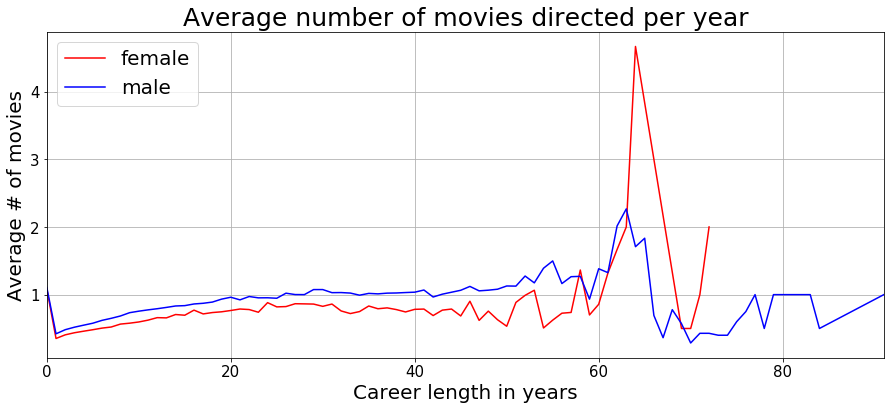

In [70]:
#plt.figure(figsize=(15,6))
fig, ax = plt.subplots(figsize=(15,6))

ax1 = female_avg_movie_per_year.plot(color='red', grid=True, label='female')
ax2 = male_avg_movie_per_year.plot(color='blue', grid=True, label='male')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.legend(h1, l1, loc=2)

#plt.rcParams.update({'font.size': 12})


SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


plt.xlabel('Career length in years')
plt.ylabel('Average # of movies')
plt.title('Average number of movies directed per year')
#ax2.yaxis.tick_left()
# Do the plot code
plt.savefig('Average_number_movies_per_Year.eps', format='eps', dpi=1200)
# Convert to eps

# Plot Drop Out

In [57]:
#plot_df(careerYearOverallDF, x=careerYearOverallDF.Career_Year_Number, y=overallPivotTableFinal.count(axis=0) / overallPivotTable.shape[0], title='Drop-Out Rate Overall')

In [58]:
# # Drop out

# #plt.plot(careerYearOverallDF.Career_Year_Number, overallPivotTableFinal.count(axis=0) / overallPivotTable.shape[0],'g-')
# plt.plot(careerYearFemaleDF.Career_Year_Number, femalePivotTableFinal.count(axis=0) / femalePivotTableFinal.shape[0],'r-')
# plt.plot(careerYearMaleDF.Career_Year_Number, malePivotTableFinal.count(axis=0) / malePivotTableFinal.shape[0],'b-')


In [59]:
# print(len(careerYearFemaleDF.Career_Year_Number), len(femalePivotTableFinal.count(axis=0) / femalePivotTableFinal.shape[0]))


# print("Career Male Length",len(careerYearMaleDF.Career_Year_Number),\
#       len(malePivotTableFinal.count(axis=0) / malePivotTableFinal.shape[0]))

In [60]:
# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset


# #Source: https://stackoverflow.com/questions/26223937/matplotlib-pandas-zoom-part-of-a-plot-with-time-series/26229669#26229669

# x = careerYearMaleDF.Career_Year_Number
# y1 =  malePivotTableFinal.count(axis=0) / malePivotTableFinal.shape[0]
# y2 = femalePivotTableFinal.count(axis=0) / femalePivotTableFinal.shape[0]

# fig = plt.figure(figsize=(15,6))
# ax = plt.axes()
# ax.plot(y1,'b-')
# ax.plot(y2,'r-')
# ax.set_xlabel('Career Length (Years)')
# ax.set_ylabel('% of directors being active')
# ax.set_title('Directors drop-out rate')
# #Range of the Zoom-in Part
# x1= 0.5
# x2 = 30
# y3=0.0
# y4=0.45


# axins = zoomed_inset_axes(ax, 1, loc=1) # zoom = 2
# axins.plot(y1,'b-')
# axins.plot(y2,'r-')#
# axins.set_xlim(x1, x2)
# axins.set_ylim(y3, y4)
# plt.xticks(visible=True)
# plt.yticks(visible=True)
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")




# SMALL_SIZE = 15
# MEDIUM_SIZE = 20
# BIGGER_SIZE = 25

# #plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# #plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title





# plt.draw()
# plt.savefig('Drop_out_rate.eps', format='eps', dpi=1200)
# plt.show()

In [61]:
# # To mathematically arrive at a year to get a drop out year cut-off 

# y = overallPivotTableFinal.count(axis=0) / overallPivotTable.shape[0]
# y.name= "Percentage"
# dropCareerYearAt = y.to_frame()
# dropCareerYearNumber = dropCareerYearAt.loc[dropCareerYearAt.Percentage >= 0.01].index.max()
# dropCareerYearNumber

In [62]:
# plt.figure(figsize  = (15,6))
# plt.xlabel('Plotting')

# y_overall = overall_avg_movie_per_year.head(dropCareerYearNumber)
# y_female = female_avg_movie_per_year.head(dropCareerYearNumber)
# x = careerYearOverallDF.Career_Year_Number.head(dropCareerYearNumber)
# #plt.plot(x,y_female,'r-')

# y_std = y_female.std(axis=0)

# plt.fill_between(x , y_female-y_std , y_female+y_std ,edgecolor = '#CC4F1B', color ='red' , linewidth = 0.5,alpha = 0.1)

# y_male = male_avg_movie_per_year.head(dropCareerYearNumber)
# #plt.plot(x,y_male,'b-')

# x_std = y_male.std(axis=0)

# plt.fill_between(x , y_male-x_std , y_male+x_std ,edgecolor = '#CC4F1B', color ='blue' , linewidth = 0.5,alpha = 0.1)

# #plt.plot(x,y_overall,'g-')


# # Limits of the graph
# xUpperLimit = overall_avg_movie_per_year.head(dropCareerYearNumber).index.max() + 4
# yUpperLimit = overall_avg_movie_per_year.head(dropCareerYearNumber)[0].max() + 0.2

# plt.axis([0, xUpperLimit, 0, yUpperLimit])

# ax3 = overall_avg_movie_per_year.head(dropCareerYearNumber).plot(color='green', grid=True, label='overall')
# ax1 = female_avg_movie_per_year.head(dropCareerYearNumber).plot(color='red', grid=True, label='female')
# ax2 = male_avg_movie_per_year.head(dropCareerYearNumber).plot(color='blue', grid=True, label='male')


# plt.ylabel('Average # of movies')

# h1, l1 = ax1.get_legend_handles_labels()

# # Limits of the graph
# xUpperLimit = overall_avg_movie_per_year.head(dropCareerYearNumber).index.max() + 4
# yUpperLimit = overall_avg_movie_per_year.head(dropCareerYearNumber)[0].max() + 0.2

# # Set axis ranges; by default this will put major ticks every 25.
# ax1.set_xlim(0,xUpperLimit)
# ax1.set_ylim(0,yUpperLimit)

# # Change major ticks to show every 10 and 0.5 units.
# ax1.xaxis.set_major_locator(MultipleLocator(round(xUpperLimit/10)))
# ax1.yaxis.set_major_locator(MultipleLocator(round(yUpperLimit/10,1)*2.5))

# # Change minor ticks to show every 10/5 units and 0.5/2 units
# ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
# ax1.yaxis.set_minor_locator(AutoMinorLocator(5))

# # Turn grid on for both major and minor ticks and style minor slightly differently.
# ax1.grid(which='major', color='#CCCCCC', linestyle='--')
# ax1.grid(which='minor', color='#CCCCCC', linestyle=':')
# ax1.set_title('Average number of movies directed per year during director\'s career')

# #plt.rcParams.update({'font.size': 14})

# #Add ticks outwards
# ax1.tick_params(which = 'both', direction = 'out')
# plt.savefig('Avg_Num_movies_SD.jpeg', format='jpeg', dpi=1200)

# plt.legend(h1, l1, loc=2)
# plt.show()



# Ranking Procedure 1

In [63]:
# #replace None values with 0

# WithFirstMovieYearDF['rating_count'] = WithFirstMovieYearDF['rating_count'].replace('None',0)
# WithFirstMovieYearDF['rating_value'] = WithFirstMovieYearDF['rating_value'].replace('None',0)

# WithFirstMovieYearDF.rating_count = WithFirstMovieYearDF.rating_count.astype(int)
# WithFirstMovieYearDF.rating_value = WithFirstMovieYearDF.rating_value.astype(float)


In [64]:
# #Copying the dataframe for the 2nd procedure to repeat the process
# RankingProcedure2 = WithFirstMovieYearDF.copy()

In [65]:
# data.groupby('director_ids')['rating_count'].sum()

In [66]:
# #Aggregating sum of Rating Count on director_ids

# female_top10_reviewCount = WithFirstMovieYearDF.loc[WithFirstMovieYearDF['Gender'] == 'Female']\
#                                                     .groupby('director_ids')['rating_count']\
#                                                     .sum()\
#                                                     .sort_values(ascending=False)


# male_top10_reviewCount = WithFirstMovieYearDF.loc[WithFirstMovieYearDF['Gender'] == 'Male']\
#                                                     .groupby('director_ids')['rating_count'].sum()\
#                                                     .sort_values(ascending=False)


# #storing the top 1000 director_ids based on rating count
# male_top_directors  = list(male_top10_reviewCount.head(1000).index)
# female_top_directors = list(female_top10_reviewCount.head(1000).index)
# top_directors_together = male_top_directors + female_top_directors
 

# #Creating dataframe consisting only from directors in the list from above male_top_directors and female_top_directors
# female_top_dataframe = WithFirstMovieYearDF[WithFirstMovieYearDF.director_ids.isin(female_top_directors)]
# male_top_dataframe = WithFirstMovieYearDF[WithFirstMovieYearDF.director_ids.isin(male_top_directors)]



# #top_directors_dataframe = data[data.director_ids.isin(top_directors_together)]
# #print(len(female_top_dataframe.director_ids.unique()),len(male_top_dataframe.director_ids.unique()))


In [67]:
# #Summing over rating value ---> top 10 directors with the highest sum of rating values 
# female_top10_ratingVal = list(female_top_dataframe.groupby('director_ids')['rating_value'].sum()\
#                         .sort_values(ascending=False)\
#                         .head(100).index)


# male_top10_ratingVal = list(male_top_dataframe.groupby('director_ids')['rating_value'].sum()\
#                         .sort_values(ascending=False)\
#                         .head(100).index)

# #creating dataframe for male and female top directors 
# female_top_dataframe_final = WithFirstMovieYearDF[WithFirstMovieYearDF.director_ids.isin(female_top10_ratingVal)]
# male_top_dataframe_final = WithFirstMovieYearDF[WithFirstMovieYearDF.director_ids.isin(male_top10_ratingVal)]




In [68]:

# male_top_dataframe_final.shape

In [69]:
TOP10_female_male_dataframe = pd.concat([female_top_dataframe_final,male_top_dataframe_final])

NameError: name 'female_top_dataframe_final' is not defined

In [ ]:
# #Check if the number of rows in the concatinated dataframe
# check = (female_top_dataframe_final.shape[0] + male_top_dataframe_final.shape[0]) - TOP10_female_male_dataframe.shape[0]

# print('Check of the merged dataframe --->', check)

In [ ]:
# sortAscendingDF = TOP10_female_male_dataframe.sort_values(by='movie_year',ascending = True)
# AscendingWithoutDuplicatesDP = sortAscendingDF.drop_duplicates(subset= 'director_ids',keep='first')

# # Store Career Start year of each director. Fetch the columns required for merge

# fetchFirstMovieYearDF = AscendingWithoutDuplicatesDP[['movie_year','director_ids']]
# fetchFirstMovieYearDF = fetchFirstMovieYearDF.rename(columns={'movie_year':'CareerStartYear'})

# WithFirstMovieYearDF = TOP10_female_male_dataframe.merge(fetchFirstMovieYearDF, on='director_ids',how = 'left')
# #WithFirstMovieYearDF["Career_Year_Number"] = WithFirstMovieYearDF.movie_year - WithFirstMovieYearDF.CareerStartYear + 1
# WithFirstMovieYearDF["Career_Year_Number"] = WithFirstMovieYearDF.movie_year - WithFirstMovieYearDF.CareerStartYear_y



# WithFirstMovieYearDF.movie_year = WithFirstMovieYearDF.movie_year.astype(int)
# WithFirstMovieYearDF.deathYear = WithFirstMovieYearDF.deathYear.astype(int)
# WithFirstMovieYearDF.birthYear = WithFirstMovieYearDF.birthYear.astype(int)




# WithFirstMovieYearDF['Dummy'] = 1


# malePivotData = WithFirstMovieYearDF.loc[WithFirstMovieYearDF['Gender'] == 'Male']
# femalePivotData = WithFirstMovieYearDF.loc[WithFirstMovieYearDF['Gender'] == 'Female']




# # Reseting the pivot table index so I can have directorID and Gender as column and rotate

# malePivotTable = pd.pivot_table(malePivotData, values='Dummy', index=['director_ids'],
#                                 columns=['Career_Year_Number',], aggfunc=np.sum)


# # Reseting the pivot table index so I can have directorID and Gender as column and rotate

# femalePivotTable = pd.pivot_table(femalePivotData, values='Dummy', index=['director_ids'],
#                                   columns=['Career_Year_Number'], aggfunc=np.sum)

# career_length_male = malePivotTable.apply(columnNameOfFirstNonNullValue, axis= 'columns')
# career_length_female = femalePivotTable.apply(columnNameOfFirstNonNullValue, axis= 'columns')


# malePivotTable["career_length"] = career_length_male.tolist()
# femalePivotTable["career_length"] = career_length_female.tolist()


# # Important: Fill 0s wherever the it is empty for each director until their career ends -- female

# m2= femalePivotTable.columns[:-1].values <= femalePivotTable.career_length.values[:, None]
# femalePivotTableFinal = femalePivotTable.iloc[:, :-1].fillna(value = 0, axis=1).where(m2)


# # Important: Fill 0s wherever the it is empty for each director until their career ends -- male

# m3 = malePivotTable.columns[:-1].values <= malePivotTable.career_length.values[:, None]
# malePivotTableFinal = malePivotTable.iloc[:, :-1].fillna(value = 0, axis=1).where(m3)


# female_avg_movie_per_year =  femalePivotTableFinal.sum(axis=0) / femalePivotTableFinal.count(axis=0)
# male_avg_movie_per_year = malePivotTableFinal.sum(axis=0) / malePivotTableFinal.count(axis=0)









# plt.figure(figsize=(15,6))
# fig, ax = plt.subplots(figsize=(15,6))

# ax1 = female_avg_movie_per_year.plot(color='red', grid=True, label='female')
# ax2 = male_avg_movie_per_year.plot(color='blue', grid=True, label='male')

# h1, l1 = ax1.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
# plt.legend(h1, l1, loc=2)

# #plt.rcParams.update({'font.size': 20})

# SMALL_SIZE = 15
# MEDIUM_SIZE = 20
# BIGGER_SIZE = 25

# #plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# #plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title









# plt.xlabel('Career length in years')
# plt.ylabel('Average # of movies')
# plt.title('Top 100 male and female directors-Ranking Procedure 1')
# #ax2.yaxis.tick_left()
# # Do the plot code
# plt.savefig('RankingProcedure_1.eps', format='eps', dpi=1200)
# # Convert to eps


# Ranking Procedure 2

In [ ]:
# #Aggregating sum of Rating value on director_ids

# female_top10_ratingVal = RankingProcedure2.loc[RankingProcedure2['Gender'] == 'Female']\
#                                                     .groupby('director_ids')['rating_value']\
#                                                     .sum()\
#                                                     .sort_values(ascending=False)


# male_top10_ratingVal = RankingProcedure2.loc[RankingProcedure2['Gender'] == 'Male']\
#                                                     .groupby('director_ids')['rating_value'].sum()\
#                                                     .sort_values(ascending=False)


# #storing the top 1000 director_ids based on rating count
# male_top_directors  = list(male_top10_ratingVal.head(1000).index)
# female_top_directors = list(female_top10_ratingVal.head(1000).index)
 

# #Creating dataframe consisting only from directors in the list from above male_top_directors and female_top_directors
# female_top_dataframe = RankingProcedure2[RankingProcedure2.director_ids.isin(female_top_directors)]
# male_top_dataframe = RankingProcedure2[RankingProcedure2.director_ids.isin(male_top_directors)]


# ############### Step 2####################################


# #Summing over rating value ---> top 10 directors with the highest sum of rating values 
# female_top10_ratingCount = list(female_top_dataframe.groupby('director_ids')['rating_count'].sum()\
#                         .sort_values(ascending=False)\
#                         .head(100).index)


# male_top10_ratingCount = list(male_top_dataframe.groupby('director_ids')['rating_count'].sum()\
#                         .sort_values(ascending=False)\
#                         .head(100).index)

# #creating dataframe for male and female top directors 
# female_top_dataframe_final_2 = RankingProcedure2[RankingProcedure2.director_ids.isin(female_top10_ratingCount)]
# male_top_dataframe_final_2 = RankingProcedure2[RankingProcedure2.director_ids.isin(male_top10_ratingCount)]



# ############### Step 3 ####################################



# TOP10_female_male_dataframe_2 = pd.concat([female_top_dataframe_final_2,male_top_dataframe_final_2])



In [ ]:
# sortAscendingDF_2 = TOP10_female_male_dataframe_2.sort_values(by='movie_year',ascending = True)
# AscendingWithoutDuplicatesDP_2 = sortAscendingDF_2.drop_duplicates(subset= 'director_ids',keep='first')

# # Store Career Start year of each director. Fetch the columns required for merge

# fetchFirstMovieYearDF_2 = AscendingWithoutDuplicatesDP_2[['movie_year','director_ids']]
# fetchFirstMovieYearDF_2 = fetchFirstMovieYearDF_2.rename(columns={'movie_year':'CareerStartYear'})

# RankingProcedure2 = TOP10_female_male_dataframe_2.merge(fetchFirstMovieYearDF_2, on='director_ids',how = 'left')
# #WithFirstMovieYearDF["Career_Year_Number"] = WithFirstMovieYearDF.movie_year - WithFirstMovieYearDF.CareerStartYear + 1
# RankingProcedure2["Career_Year_Number"] = RankingProcedure2.movie_year - RankingProcedure2.CareerStartYear_y



# RankingProcedure2.movie_year = RankingProcedure2.movie_year.astype(int)
# RankingProcedure2.deathYear = RankingProcedure2.deathYear.astype(int)
# RankingProcedure2.birthYear = RankingProcedure2.birthYear.astype(int)




# RankingProcedure2['Dummy'] = 1


# malePivotData_2 = RankingProcedure2.loc[RankingProcedure2['Gender'] == 'Male']
# femalePivotData_2 = RankingProcedure2.loc[RankingProcedure2['Gender'] == 'Female']




# # Reseting the pivot table index so I can have directorID and Gender as column and rotate

# malePivotTable_2 = pd.pivot_table(malePivotData_2, values='Dummy', index=['director_ids'],
#                                 columns=['Career_Year_Number',], aggfunc=np.sum)


# # Reseting the pivot table index so I can have directorID and Gender as column and rotate

# femalePivotTable_2 = pd.pivot_table(femalePivotData_2, values='Dummy', index=['director_ids'],
#                                   columns=['Career_Year_Number'], aggfunc=np.sum)

# career_length_male_2 = malePivotTable_2.apply(columnNameOfFirstNonNullValue, axis= 'columns')
# career_length_female_2 = femalePivotTable_2.apply(columnNameOfFirstNonNullValue, axis= 'columns')


# malePivotTable_2["career_length"] = career_length_male_2.tolist()
# femalePivotTable_2["career_length"] = career_length_female_2.tolist()


# # Important: Fill 0s wherever the it is empty for each director until their career ends -- female

# m2_2= femalePivotTable_2.columns[:-1].values <= femalePivotTable_2.career_length.values[:, None]
# femalePivotTableFinal_2 = femalePivotTable_2.iloc[:, :-1].fillna(value = 0, axis=1).where(m2_2)


# # Important: Fill 0s wherever the it is empty for each director until their career ends -- male

# m3_2 = malePivotTable_2.columns[:-1].values <= malePivotTable_2.career_length.values[:, None]
# malePivotTableFinal_2 = malePivotTable_2.iloc[:, :-1].fillna(value = 0, axis=1).where(m3_2)


# female_avg_movie_per_year_2 =  femalePivotTableFinal_2.sum(axis=0) / femalePivotTableFinal_2.count(axis=0)
# male_avg_movie_per_year_2 = malePivotTableFinal_2.sum(axis=0) / malePivotTableFinal_2.count(axis=0)





# #### Plotting #####

# plt.figure(figsize=(15,6))
# #fig, ax = plt.subplots(figsize=(15,6))

# ax1 = female_avg_movie_per_year_2.plot(color='red', grid=True, label='female')
# ax2 = male_avg_movie_per_year_2.plot(color='blue', grid=True, label='male')

# h1, l1 = ax1.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
# plt.legend(h1, l1, loc=2)

# #plt.rcParams.update({'font.size': 20})


# SMALL_SIZE = 15
# MEDIUM_SIZE = 20
# BIGGER_SIZE = 25

# #plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# #plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title






# plt.xlabel('Career length in years')
# plt.ylabel('Average # of movies')
# plt.title('Top 100 male and female directors-Ranking Procedure 2')
# #ax2.yaxis.tick_left()
# # Do the plot code
# plt.savefig('RankingProcedure_2.eps', format='eps', dpi=1200)


# # Convert to eps